In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

In [5]:
ligas = pd.read_csv("data/LIGAS.csv", sep= '|')
ligas.head()
elim = pd.read_csv("data/ELIMINATORIAS.csv", sep = '|')
elim.head()

,Unnamed: 0,Partidos,Match date,Matches,Teams,Goals,"Chances, % of conversion",Shots,Shots on target,Passes,...,"Ball possession, %",Entrances to the opposition half,Entrances to the final third,Entrance to the penalty box,"Average duration of ball possession, min","Ball possessions, quantity","Ball possession, sec",Type of match,Competition,resultados
0,0,Real Madrid 5 : 1 Celtic 2022-11-02,2022-11-02,Real Madrid 5 : 1 Celtic,RM,5,36.0,23,11,780,...,62.0,57,44,27,26.15,83,2170.69,Group Stage,Champions League,Victory
1,1,Real Madrid 5 : 1 Celtic 2022-11-02,2022-11-02,Real Madrid 5 : 1 Celtic,CEL,1,20.0,14,8,428,...,38.0,52,39,11,15.66,84,1315.64,Group Stage,Champions League,Loss
2,2,Shakhtar D. 0 : 4 RB Leipzig 2022-11-02,2022-11-02,Shakhtar D. 0 : 4 RB Leipzig,SD,0,0.0,5,1,502,...,51.0,39,21,6,20.83,81,1687.54,Group Stage,Champions League,Loss
3,3,Shakhtar D. 0 : 4 RB Leipzig 2022-11-02,2022-11-02,Shakhtar D. 0 : 4 RB Leipzig,RL,4,67.0,12,7,544,...,49.0,48,31,13,21.08,76,1601.70,Group Stage,Champions League,Victory
4,4,Chelsea 2 : 1 Dinamo Zagreb 2022-11-02,2022-11-02,Chelsea 2 : 1 Dinamo Zagreb,CHE,2,17.0,19,6,648,...,59.0,80,53,27,18.16,103,1870.90,Group Stage,Champions League,Victory


In [6]:
ligas.columns

Index(['Unnamed: 0', 'Partidos', 'Match date', 'Matches', 'Teams', 'Goals',
       'Chances, % of conversion', 'Shots', 'Shots on target', 'Passes',
       'Accurate passes, %', 'Key passes', 'Key passes accurate',
       'Lost balls in own half', 'Team pressing', 'Pressing efficiency, %',
       'Ball possession, %', 'Entrances to the opposition half',
       'Entrances to the final third', 'Entrance to the penalty box',
       'Average duration of ball possession, min',
       'Ball possessions, quantity', 'Ball possession, sec', 'Competition',
       'resultados', 'Type of match'],
      dtype='object')

In [7]:
ligas.drop(['Unnamed: 0'], axis=1, inplace=True)
elim.drop(['Unnamed: 0'], axis = 1, inplace=True)

melted = pd.concat([ligas, elim], axis= 0, ignore_index=True)

In [8]:
melted.to_csv('data/ALL.csv', sep="|")

Text(0.5, 1.0, 'Correlación entre variables ofensivas, por equipo')

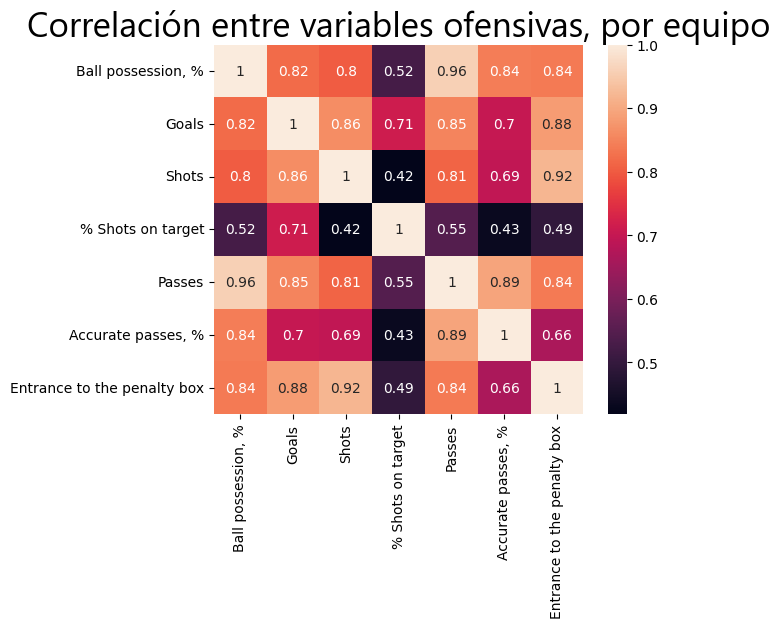

In [134]:
ligas_corr_teams = ligas.groupby(['Teams'])[['Ball possession, %', 'Goals', 'Shots', '% Shots on target',
                        'Passes', 'Accurate passes, %', 'Entrance to the penalty box']].mean()
font = {'family': 'gadugi'}
sns.heatmap(ligas_corr_teams.corr(), square=True, annot= True)
plt.title('Correlación entre variables ofensivas, por equipo', fontsize = 25, fontdict = font)

In [131]:
ligas['% Shots on target'] = (ligas['Shots on target']/ligas['Shots'] * 100).round(2)
ligas_correlate = ligas[['Ball possession, %', 'Goals', 'Shots', '% Shots on target',
                        'Passes', 'Accurate passes, %', 'Entrance to the penalty box']]
ligas_correlate.head()

,"Ball possession, %",Goals,Shots,% Shots on target,Passes,"Accurate passes, %",Entrance to the penalty box
0,44.0,0,5,20.00,393,83.0,7
1,56.0,2,9,66.67,508,84.0,18
2,61.0,1,17,35.29,545,83.0,11
3,39.0,2,13,15.38,350,75.0,6
4,58.0,2,10,40.00,619,85.0,11


Text(0.5, 1.0, 'Correlación entre variables ofensivas, por partido')

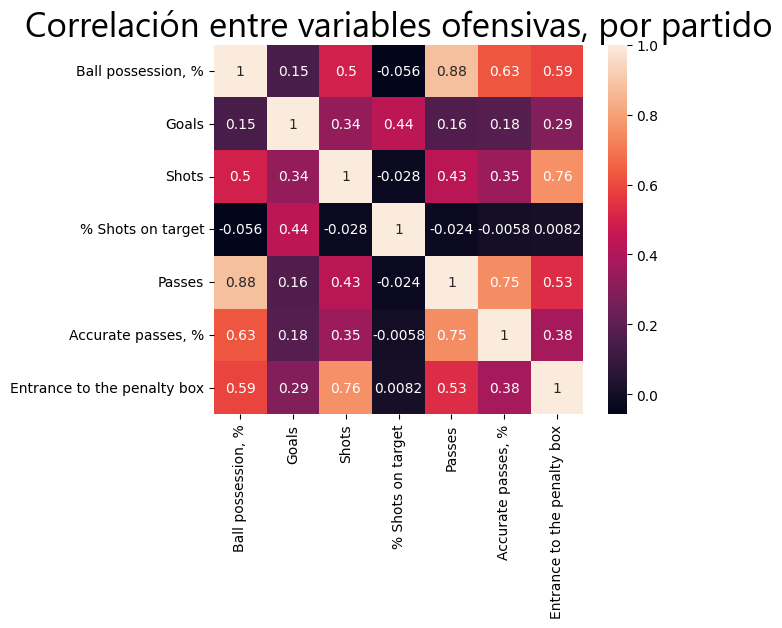

In [132]:
font = {'family': 'gadugi'}
sns.heatmap(ligas_correlate.corr(), square=True, annot= True)
plt.title('Correlación entre variables ofensivas, por partido', fontsize = 25, fontdict = font)

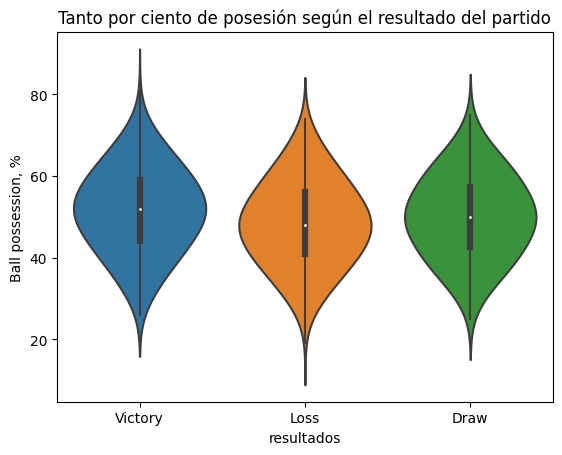

In [11]:
plt.figure()
plt.title('Tanto por ciento de posesión según el resultado del partido')
sns.violinplot(data=ligas[ligas['Competition'] == 'Bundesliga'], x='resultados', y= 'Ball possession, %', bw=.5, inner= 'box');

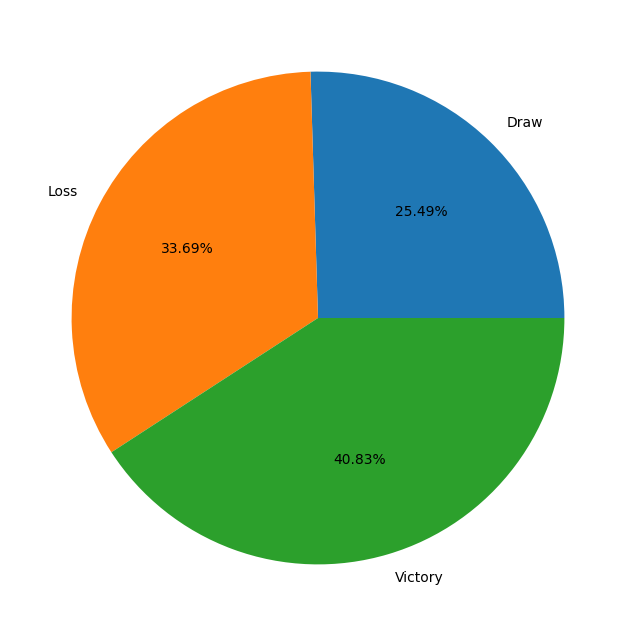

In [12]:
data = ligas[(ligas['Ball possession, %'] > 50)].groupby(['resultados'])['Ball possession, %'].count()
 
# Create a circle for the center of the plot
# my_circle=plt.Circle( (0,0),
#                      0.7, # Grosor del donut
#                      color='white')

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%');

p=plt.gcf()
p.gca();

In [22]:
ligas['Goals against'] = range(0, len(ligas))
def goles_contra(x):
    if (x+2) % 2 == 0:       
        return ligas['Goals'][x+1]                           
    elif (x+2) % 1 == 0:
        return ligas['Goals'][x-1]
    else:
        return False

ligas['Goals against'] = ligas['Goals against'].apply(goles_contra)
ligas.head()

,Partidos,Match date,Matches,Teams,Goals,"Chances, % of conversion",Shots,Shots on target,Passes,"Accurate passes, %",...,Entrances to the opposition half,Entrances to the final third,Entrance to the penalty box,"Average duration of ball possession, min","Ball possessions, quantity","Ball possession, sec",Competition,resultados,Type of match,Goals against
0,Almeria 0 : 2 Real Sociedad 2023-01-08,2023-01-08,Almeria 0 : 2 Real Sociedad,ALM,0,0.0,5,1,393,83.0,...,42,21,7,12.66,106,1341.76,LaLiga,Loss,League,2
1,Almeria 0 : 2 Real Sociedad 2023-01-08,2023-01-08,Almeria 0 : 2 Real Sociedad,RS,2,33.0,9,6,508,84.0,...,67,37,18,16.12,106,1709.20,LaLiga,Victory,League,0
2,Rayo Vallecano 1 : 2 Real Betis 2023-01-08,2023-01-08,Rayo Vallecano 1 : 2 Real Betis,RAY,1,25.0,17,6,545,83.0,...,73,46,11,17.37,112,1945.29,LaLiga,Loss,League,2
3,Rayo Vallecano 1 : 2 Real Betis 2023-01-08,2023-01-08,Rayo Vallecano 1 : 2 Real Betis,RB,2,40.0,13,2,350,75.0,...,48,26,6,12.27,102,1251.11,LaLiga,Victory,League,1
4,Sevilla 2 : 1 Getafe 2023-01-08,2023-01-08,Sevilla 2 : 1 Getafe,SEV,2,40.0,10,4,619,85.0,...,62,42,11,17.85,102,1820.27,LaLiga,Victory,League,1


In [23]:
ligas['Shots against'] = range(0, len(ligas))
def tiros_contra(x):
    if (x+2) % 2 == 0:       
        return ligas['Shots'][x+1]                           
    elif (x+2) % 1 == 0:
        return ligas['Shots'][x-1]
    else:
        return False

ligas['Shots against'] = ligas['Shots against'].apply(tiros_contra)
ligas.head()

,Partidos,Match date,Matches,Teams,Goals,"Chances, % of conversion",Shots,Shots on target,Passes,"Accurate passes, %",...,Entrances to the final third,Entrance to the penalty box,"Average duration of ball possession, min","Ball possessions, quantity","Ball possession, sec",Competition,resultados,Type of match,Goals against,Shots against
0,Almeria 0 : 2 Real Sociedad 2023-01-08,2023-01-08,Almeria 0 : 2 Real Sociedad,ALM,0,0.0,5,1,393,83.0,...,21,7,12.66,106,1341.76,LaLiga,Loss,League,2,9
1,Almeria 0 : 2 Real Sociedad 2023-01-08,2023-01-08,Almeria 0 : 2 Real Sociedad,RS,2,33.0,9,6,508,84.0,...,37,18,16.12,106,1709.20,LaLiga,Victory,League,0,5
2,Rayo Vallecano 1 : 2 Real Betis 2023-01-08,2023-01-08,Rayo Vallecano 1 : 2 Real Betis,RAY,1,25.0,17,6,545,83.0,...,46,11,17.37,112,1945.29,LaLiga,Loss,League,2,13
3,Rayo Vallecano 1 : 2 Real Betis 2023-01-08,2023-01-08,Rayo Vallecano 1 : 2 Real Betis,RB,2,40.0,13,2,350,75.0,...,26,6,12.27,102,1251.11,LaLiga,Victory,League,1,17
4,Sevilla 2 : 1 Getafe 2023-01-08,2023-01-08,Sevilla 2 : 1 Getafe,SEV,2,40.0,10,4,619,85.0,...,42,11,17.85,102,1820.27,LaLiga,Victory,League,1,10


In [24]:
ligas_pos = ligas[ligas['Ball possession, %'] > 60]
ligas_sinpos = ligas[ligas['Ball possession, %'] < 40]

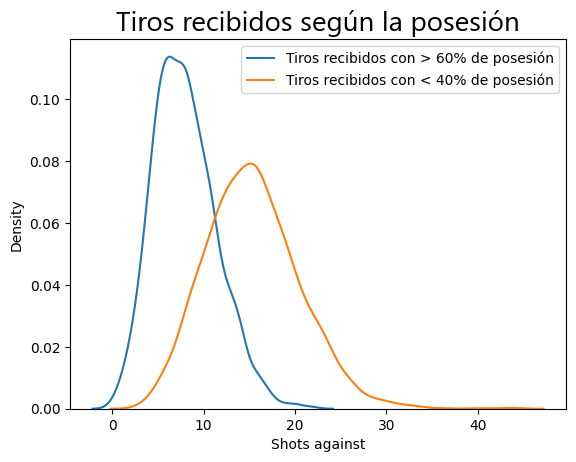

In [38]:
plt.figure()
sns.kdeplot(data=ligas_pos["Shots against"], label="Tiros recibidos con > 60% de posesión")
sns.kdeplot(data=ligas_sinpos["Shots against"], label="Tiros recibidos con < 40% de posesión")
plt.title('Tiros recibidos según la posesión', fontdict={'family': 'gadugi'}, fontsize=20)
plt.legend()

<AxesSubplot:xlabel='Shots on target', ylabel='Density'>

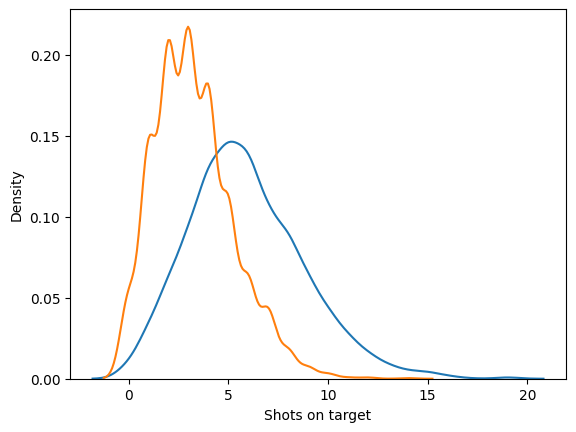

In [30]:
sns.kdeplot(data=ligas_pos['Shots on target'], label="Line 3")
sns.kdeplot(data=ligas_sinpos["Shots on target"], label="Line 4")

C:\Users\ramon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


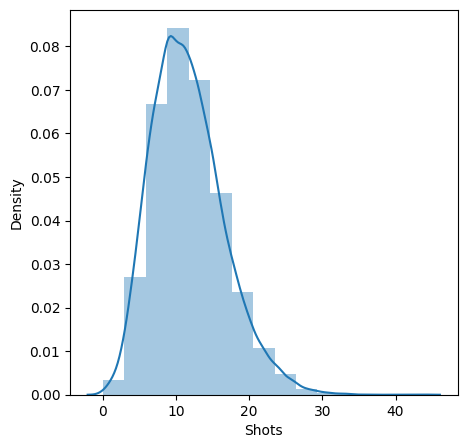

In [46]:
plt.figure(figsize=(5,5))
sns.distplot(melted['Shots'],
            kde=True,
            bins=15);

In [48]:
!pip install squarify

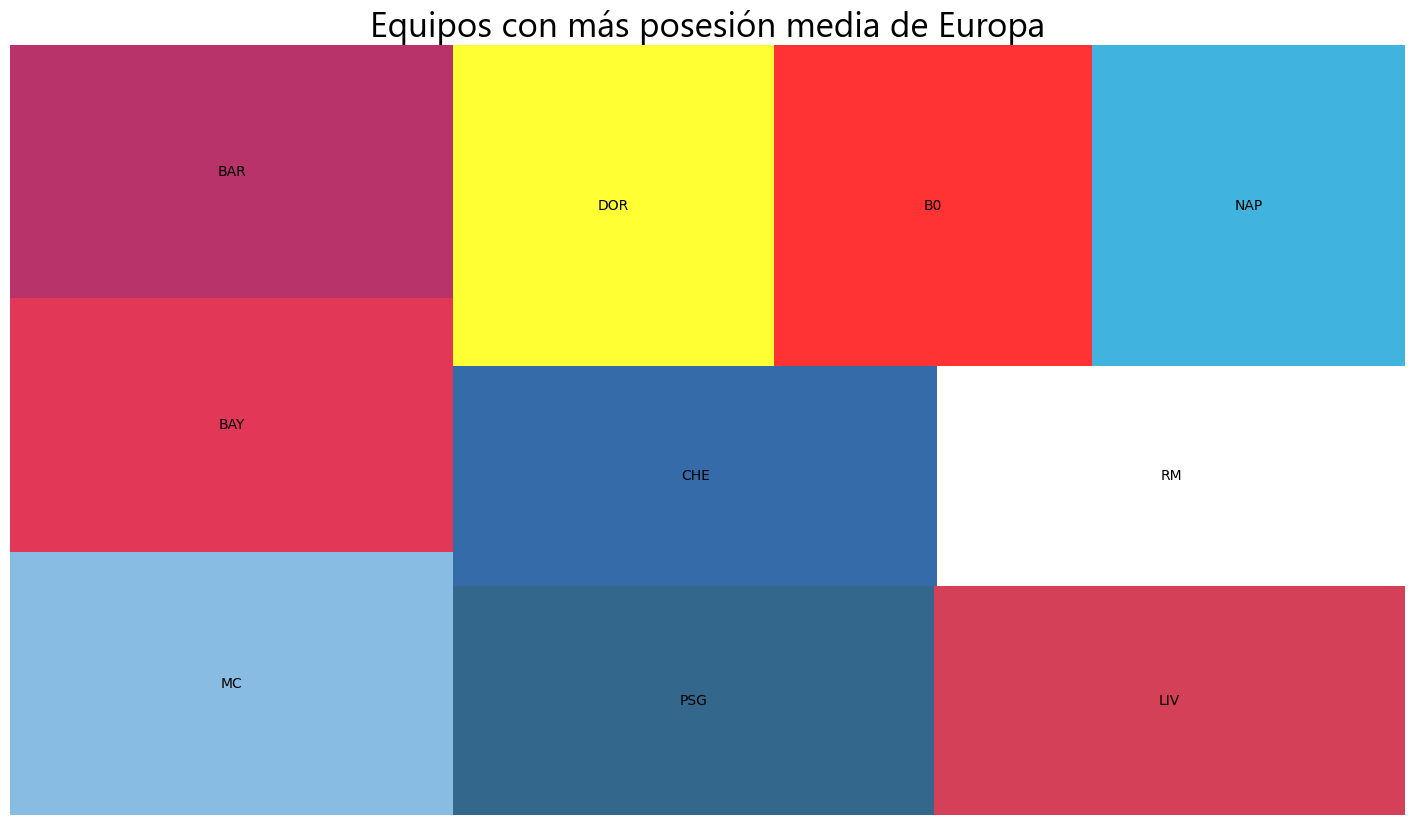

Teams
MC     65.526627
BAY    63.092715
BAR    63.000000
PSG    61.841772
LIV    60.662722
Name: Ball possession, %, dtype: float64

In [100]:
import squarify
colors_teams = ['#6CABDD', '#DC052D', '#A50044',
                '#004170', '#C8102E','#034694', '#FFFFFF', '#FFFF00', 
                '#FF0000', '#12A0D7']
data = ligas.groupby("Teams")['Ball possession, %'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(18,10))
squarify.plot(sizes=data.values, label=data.index , alpha=.8, color = colors_teams)
plt.axis('off')
plt.title("Equipos con más posesión media de Europa", fontsize = 25, fontdict={'family': 'gadugi'})
plt.show()
data.head()

In [104]:
ligas['Time of possession per shot on target'] = ligas['Ball possession, sec']/ligas['Shots on target']
ligas

,Partidos,Match date,Matches,Teams,Goals,"Chances, % of conversion",Shots,Shots on target,Passes,"Accurate passes, %",...,"Average duration of ball possession, min","Ball possessions, quantity","Ball possession, sec",Competition,resultados,Type of match,Goals against,Shots against,Shots on target/time of possession,Time of possession per shot on target
0,Almeria 0 : 2 Real Sociedad 2023-01-08,2023-01-08,Almeria 0 : 2 Real Sociedad,ALM,0,0.0,5,1,393,83.0,...,12.66,106,1341.76,LaLiga,Loss,League,2,9,0.000745,1341.760000
1,Almeria 0 : 2 Real Sociedad 2023-01-08,2023-01-08,Almeria 0 : 2 Real Sociedad,RS,2,33.0,9,6,508,84.0,...,16.12,106,1709.20,LaLiga,Victory,League,0,5,0.003510,284.866667
2,Rayo Vallecano 1 : 2 Real Betis 2023-01-08,2023-01-08,Rayo Vallecano 1 : 2 Real Betis,RAY,1,25.0,17,6,545,83.0,...,17.37,112,1945.29,LaLiga,Loss,League,2,13,0.003084,324.215000
3,Rayo Vallecano 1 : 2 Real Betis 2023-01-08,2023-01-08,Rayo Vallecano 1 : 2 Real Betis,RB,2,40.0,13,2,350,75.0,...,12.27,102,1251.11,LaLiga,Victory,League,1,17,0.001599,625.555000
4,Sevilla 2 : 1 Getafe 2023-01-08,2023-01-08,Sevilla 2 : 1 Getafe,SEV,2,40.0,10,4,619,85.0,...,17.85,102,1820.27,LaLiga,Victory,League,1,10,0.002197,455.067500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16007,Nice 0 : 1 Reims 2018-08-11,2018-08-11,Nice 0 : 1 Reims,REI,1,33.0,5,4,280,76.0,...,10.94,95,1039.00,Ligue 1,Victory,League,0,17,0.003850,259.750000
16008,Saint-Etienne 2 : 1 Guingamp 2018-08-11,2018-08-11,Saint-Etienne 2 : 1 Guingamp,SAI,2,33.0,9,6,391,79.0,...,11.83,106,1254.00,Ligue 1,Victory,League,1,12,0.004785,209.000000
16009,Saint-Etienne 2 : 1 Guingamp 2018-08-11,2018-08-11,Saint-Etienne 2 : 1 Guingamp,GUI,1,40.0,12,4,527,83.0,...,15.78,113,1783.00,Ligue 1,Loss,League,2,9,0.002243,445.750000
16010,Marseille 4 : 0 Toulouse 2018-08-10,2018-08-10,Marseille 4 : 0 Toulouse,MAR,4,44.0,21,10,541,87.0,...,15.88,112,1778.03,Ligue 1,Victory,League,0,5,0.005624,177.803000


In [112]:
ultimo_insight = ligas.groupby(['Teams'])[['Shots on target', 'Ball possession, sec']].sum()
ultimo_insight['Seconds of possession per shot on target'] = ultimo_insight['Ball possession, sec'] / ultimo_insight['Shots on target']
ultimo_insight['Seconds of possession per shot on target'].sort_values(ascending=True)[:10]

Teams
BAY    263.488855
ATA    291.051668
ROM    297.035187
RL     298.470482
BRF    299.673294
INT    301.688977
MU     304.660359
LYO    305.986073
NAP    308.078027
BRS    311.061656
Name: Seconds of possession per shot on target, dtype: float64

In [114]:
!pip install plotly
!pip install wordcloud

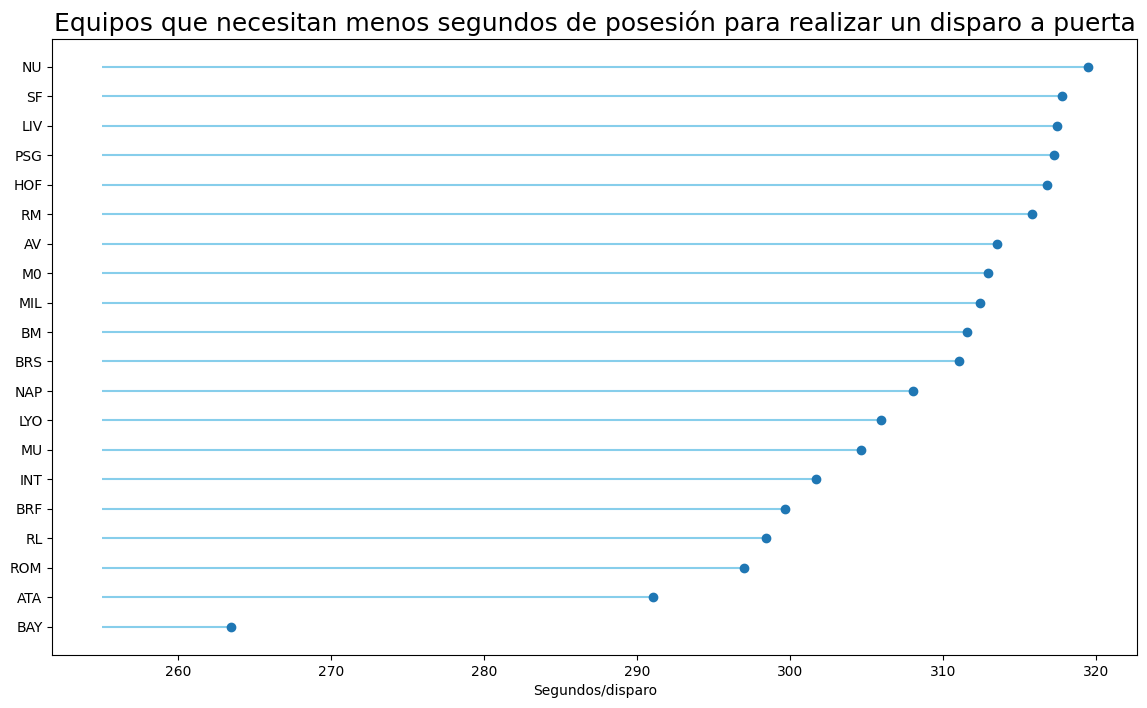

In [127]:
conteo = ultimo_insight['Seconds of possession per shot on target'].sort_values(ascending=True)[:20]

plt.figure(figsize=(14,8))
plt.hlines(y=conteo.index,
           xmin=255,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o")
plt.title('Equipos que necesitan menos segundos de posesión para realizar un disparo a puerta', fontsize= 18)
plt.xlabel('Segundos/disparo');